In [47]:
import numpy as np
import os
import pandas as pd
import plotly.express as px

segments = [
    "Cerebrospinal Fluid",
    "Cortical Grey Matter",
    "White Matter",
    "Background",
    "Ventricle",
    "Cerebelum",
    "Deep Grey Matter",
    "Brainstem",
    "Hippocampus"
]

In [26]:
seg_path = r"D:\school\research\data\dhcp_rel2\processed\segments\l1"

results = {x: [] for x in segments}
for file in os.listdir(seg_path)[0:20]:
    img = np.load(os.path.join(seg_path, file))
    vals, counts = np.unique(img, return_counts=True)
    counts = counts[1:]
    percentages = counts / np.sum(counts)
    for index, name in enumerate(segments):
        results[name].append(percentages[index])

In [30]:
normal = {x: np.mean(y) * 100 for x, y in results.items()}

In [28]:
seg_path = r"D:\school\research\data\dhcp_rel2\processed\segments\l5"

abnormal_results = {x: [] for x in segments}
for file in os.listdir(seg_path)[0:20]:
    img = np.load(os.path.join(seg_path, file))
    vals, counts = np.unique(img, return_counts=True)
    counts = counts[1:]
    percentages = counts / np.sum(counts)
    for index, name in enumerate(segments):
        abnormal_results[name].append(percentages[index])

In [31]:
abnormal = {x: np.mean(y) * 100 for x, y in abnormal_results.items()}

In [41]:
segment = []
brain_type = []
seg_percentages = []

segment.extend(normal.keys())
brain_type.extend(["Normal" for x in normal.keys()])
seg_percentages.extend(normal.values())

segment.extend(abnormal.keys())
brain_type.extend(["Abnormal" for x in abnormal.keys()])
seg_percentages.extend(abnormal.values())

In [49]:
per_df = pd.DataFrame({
    "Segment": segment,
    "Brain Type": brain_type,
    "Percentage Pixels": seg_percentages
})

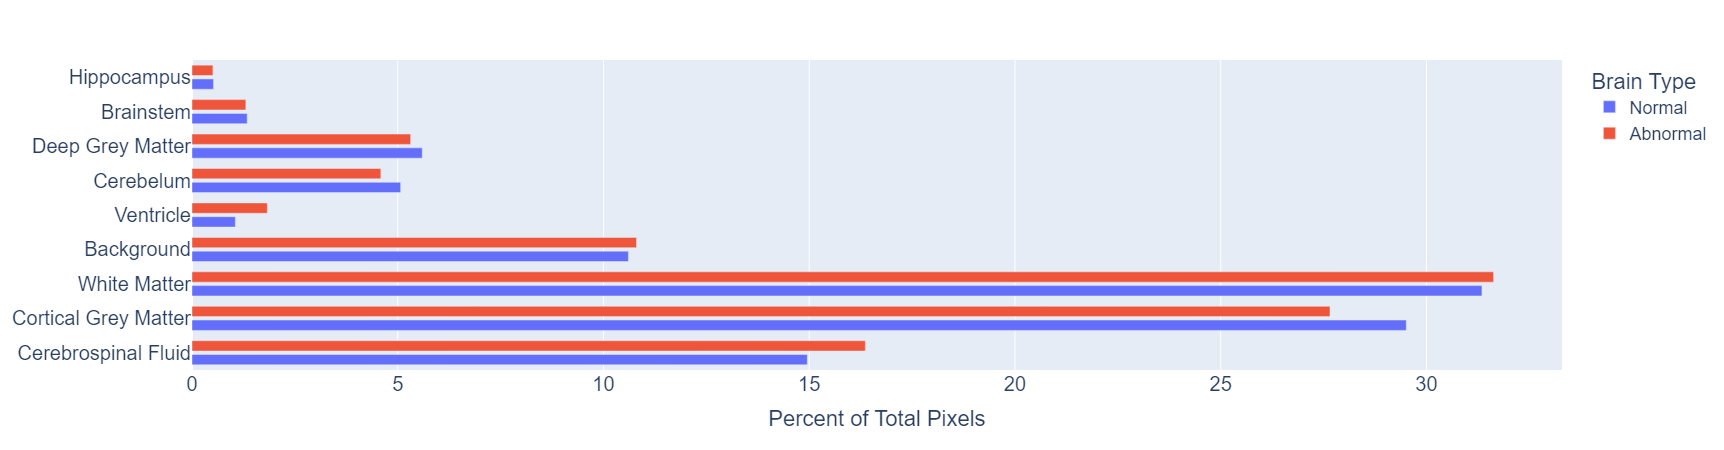

In [82]:
fig = px.bar(per_df, x="Percentage Pixels", y="Segment", color="Brain Type", orientation='h', barmode="group")
fig.update_layout(
    xaxis_title="Percent of Total Pixels",
    yaxis_title=None,
    legend_title="Brain Type",
    font=dict(
        family="Arial",
        size=18
    ),
    yaxis = dict(
        tickfont = dict(size=20)
    ),
    xaxis = dict(
        tickfont = dict(size=20)
    ),
    autosize=False
)
fig.update_traces(width=0.3)
fig.show()
fig.write_image("figures/segment_distributions.png", width=2000, height=500)